In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read csv file
df = pd.read_csv('bank-full.csv',sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## EDA

In [3]:
# Check null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
df.shape

(14049, 17)

## Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
mappings = [ ]

In [17]:
label_df = df.drop('y',axis = 1)

In [24]:
for i, col in enumerate(label_df):
    if label_df[col].dtype == 'object':
        label_df[col] = le.fit_transform(np.array(label_df[col].astype(str)).reshape(-1, ))
        

In [27]:
mappings.append(dict(zip(le.classes_,range(1,len(le.classes_)+1))))

In [28]:
label_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,2,261,1,-1,0,0
1,44,9,2,1,0,29,1,0,2,5,2,151,1,-1,0,0
2,33,2,1,1,0,2,1,1,2,5,2,76,1,-1,0,0
3,47,1,1,3,0,1506,1,0,2,5,2,92,1,-1,0,0
4,33,11,2,3,0,1,0,0,2,5,2,198,1,-1,0,0


## Splitting the data into training and testing set

In [5]:
# Perform splitting
from sklearn.model_selection import train_test_split

In [6]:
x = df.iloc[:, :-1]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14044,38,technician,single,secondary,no,1932,yes,no,cellular,11,jul,159,1,-1,0,unknown
14045,51,technician,married,secondary,no,-192,yes,no,telephone,11,jul,57,1,-1,0,unknown
14046,37,blue-collar,single,secondary,no,1672,yes,no,cellular,11,jul,484,1,-1,0,unknown
14047,34,management,married,tertiary,no,161,yes,no,cellular,11,jul,378,1,-1,0,unknown


In [7]:
y = df['y']
y

0        no
1        no
2        no
3        no
4        no
         ..
14044    no
14045    no
14046    no
14047    no
14048    no
Name: y, Length: 14049, dtype: object

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(label_df,y,train_size=0.75,random_state=1)

In [31]:
xtrain

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
38,36,0,0,1,0,506,1,0,2,5,2,577,1,-1,0,0
12112,49,11,1,2,0,325,0,0,2,20,1,63,15,-1,0,0
3021,44,1,1,0,0,0,1,0,2,14,2,220,7,-1,0,0
8153,52,0,1,1,0,101,1,1,2,2,1,140,4,-1,0,0
1718,22,8,2,1,0,2412,1,0,2,9,2,238,2,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,35,4,1,2,0,267,1,0,2,7,2,192,1,-1,0,0
5192,48,4,1,2,0,4191,0,0,2,21,2,363,6,-1,0,0
12172,45,0,1,3,0,1783,0,0,2,20,1,11,11,-1,0,0
235,45,1,1,0,0,25,1,0,2,5,2,40,1,-1,0,0


## Model Building

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lg = LogisticRegression()

In [32]:
# Train the model
lg.fit(xtrain,ytrain)

LogisticRegression()

In [33]:
# Get the prediction
ypred = lg.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
len(xtest)

3513

In [35]:
len(ypred)

3513

In [36]:
# Compare ypred with ytest
print('Actual y : ', ytest[:25])
print('Predicted y : ', ypred[:25])

Actual y :  [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
Predicted y :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Testing Model Accuracy

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3362
           1       0.57      0.23      0.33       151

    accuracy                           0.96      3513
   macro avg       0.77      0.61      0.65      3513
weighted avg       0.95      0.96      0.95      3513



In [39]:
confusion_matrix(ytest,ypred)

array([[3336,   26],
       [ 116,   35]], dtype=int64)

Text(33.0, 0.5, 'Predicted values')

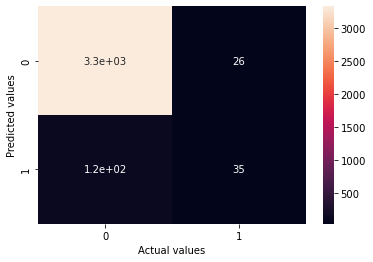

In [40]:
sns.heatmap(confusion_matrix(ytest,ypred),annot = True)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

## Threshold Selection

In [42]:
proba = lg.predict_proba(xtest)
proba

array([[0.99892745, 0.00107255],
       [0.75266831, 0.24733169],
       [0.94846314, 0.05153686],
       ...,
       [0.98309161, 0.01690839],
       [0.9863088 , 0.0136912 ],
       [0.99856373, 0.00143627]])

In [43]:
proba = lg.predict_proba(xtest)[:,1]
proba

array([0.00107255, 0.24733169, 0.05153686, ..., 0.01690839, 0.0136912 ,
       0.00143627])

In [44]:
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score

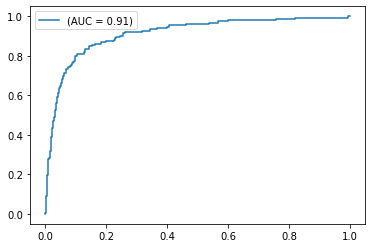

In [45]:
auc = roc_auc_score(ytest,proba)
fpr , tpr , thresdhold = roc_curve(ytest,proba)

plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)
plt.legend()

In [46]:
len(thresdhold)

219

In [47]:
#Check at which threshold we have highest accuracy

accuracy = []

for i in thresdhold:
    
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))
    
final_threshold = pd.concat([pd.Series(thresdhold),pd.Series(accuracy)],axis = 1)
final_threshold.columns = ['Threshold','Accuracy']
final_threshold.sort_values(by= 'Accuracy',ascending=False)

,Threshold,Accuracy
37,4.702603e-01,0.959863
36,4.723897e-01,0.959863
35,4.913029e-01,0.959863
34,5.107874e-01,0.959579
41,4.292548e-01,0.959294
...,...,...
214,3.049817e-03,0.214631
215,3.047937e-03,0.214347
216,7.350613e-05,0.049246
217,6.520641e-05,0.048961


* Here Optimal threshold value is 4.7

In [48]:
from sklearn.preprocessing import binarize


In [49]:
y = binarize([proba],threshold=4.7)[0]

In [50]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [51]:
print(classification_report(ytest,y))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3362
           1       0.00      0.00      0.00       151

    accuracy                           0.96      3513
   macro avg       0.48      0.50      0.49      3513
weighted avg       0.92      0.96      0.94      3513

